## Data Preprocessing

In [51]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

Import subject information

In [96]:
subjects = pd.read_csv("./data_subjects_info.csv")
subjects

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0
5,6,76,180,28,1
6,7,62,175,30,0
7,8,52,161,24,0
8,9,93,190,32,1
9,10,72,164,31,0


Rename files

In [53]:
"""
def rm(old_file_path, new_file_name):
    dir_path = os.path.dirname(old_file_path)
    new_file_path = os.path.join(dir_path, new_file_name)
    os.rename(old_file_path, new_file_path)

folders = os.listdir(r'A_DeviceMotion_data/')

for folder in folders:
    folder_name = folder.split('_')

    if(int(folder_name[1])<= 9):
        old_folder_path = './A_DeviceMotion_data/' + folder
        new_folder_name = folder_name[0] + "_0" + folder_name[1]
        folder = new_folder_name
        
        rm(old_folder_path, new_folder_name)

    files = os.listdir(r'./A_DeviceMotion_data/' + folder)

    for file in files:
        file_name = re.split('_|\\.', file)
        if(int(file_name[1])<= 9):
            old_file_path = './A_DeviceMotion_data/' + folder + '/' + file
            new_file_name = 'sub_0' + file_name[1] + '.csv'

            rm(old_file_path, new_file_name)
"""

'\ndef rm(old_file_path, new_file_name):\n    dir_path = os.path.dirname(old_file_path)\n    new_file_path = os.path.join(dir_path, new_file_name)\n    os.rename(old_file_path, new_file_path)\n\nfolders = os.listdir(r\'A_DeviceMotion_data/\')\n\nfor folder in folders:\n    folder_name = folder.split(\'_\')\n\n    if(int(folder_name[1])<= 9):\n        old_folder_path = \'./A_DeviceMotion_data/\' + folder\n        new_folder_name = folder_name[0] + "_0" + folder_name[1]\n        folder = new_folder_name\n        \n        rm(old_folder_path, new_folder_name)\n\n    files = os.listdir(r\'./A_DeviceMotion_data/\' + folder)\n\n    for file in files:\n        file_name = re.split(\'_|\\.\', file)\n        if(int(file_name[1])<= 9):\n            old_file_path = \'./A_DeviceMotion_data/\' + folder + \'/\' + file\n            new_file_name = \'sub_0\' + file_name[1] + \'.csv\'\n\n            rm(old_file_path, new_file_name)\n'

Combines all CSVs with labeled columns for easier analysis.

In [54]:
dfs = list()

folders = os.listdir(r'A_DeviceMotion_data/')
for folder in folders:
    path = r'A_DeviceMotion_data/' + folder
    files = Path(path).glob('*.csv')
    for file in files:
        data = pd.read_csv(file)
        data['subject_code'] = int(file.stem.split('_')[1])
        data['motion_type'] = folder.split('_')[0]
        data['trial_type'] = "long" if int(folder.split('_')[1]) <= 9 else "short"
        data['file_path'] = folder + "/" + file.stem
        dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

df.rename(columns = {'Unnamed: 0':'reading_number'}, inplace = True)
df

,reading_number,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_code,motion_type,trial_type,file_path
0,0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670,12,dws,short,dws_11/sub_12
1,1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291,12,dws,short,dws_11/sub_12
2,2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275,12,dws,short,dws_11/sub_12
3,3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293,12,dws,short,dws_11/sub_12
4,4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049,12,dws,short,dws_11/sub_12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,2327,0.083275,-0.955984,2.403061,0.047978,0.816882,-0.574806,0.833153,-0.095074,0.246557,-0.031468,0.477521,-0.195183,23,dws,long,dws_01/sub_23
1412861,2328,0.091815,-0.944560,2.410397,0.053737,0.810239,-0.583631,0.382486,0.304818,0.267466,0.035374,0.267260,-0.173922,23,dws,long,dws_01/sub_23
1412862,2329,0.109647,-0.941116,2.419825,0.064441,0.808216,-0.585350,0.001522,0.571208,0.313602,-0.088900,0.245480,-0.018898,23,dws,long,dws_01/sub_23
1412863,2330,0.127894,-0.944655,2.431169,0.074744,0.810295,-0.581236,-0.339789,0.333859,0.291225,-0.136894,0.136482,0.119108,23,dws,long,dws_01/sub_23


## Basic Data Exploration

In [55]:
df.dtypes

reading_number          int64
attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
subject_code            int64
motion_type            object
trial_type             object
file_path              object
dtype: object

In [56]:
df.isna().sum()

reading_number        0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
subject_code          0
motion_type           0
trial_type            0
file_path             0
dtype: int64

Frequencies of Motion Types

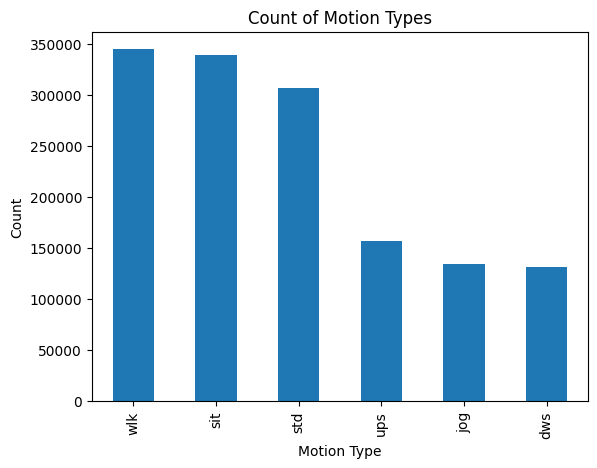

In [57]:
df['motion_type'].value_counts().plot(kind='bar')
plt.xlabel('Motion Type')
plt.ylabel('Count')
plt.title('Count of Motion Types')
plt.show()

It seems that our data has way more readings from walking trials compared to other trials. I wonder why the number of readings for sitting trials is comparable to the number of walking trials but jogging and downstair traisl are so low.

## Exploration 1
In this exploration we will reveal some basic summary statistics about each motion type. Then we will take a closer look at subjects. We will be making some modifications to the dataframe so we will be creating a copy as we still want to preserve the original dataframe for later explorations.

In [58]:
df_1 = df

In [59]:
df_1.groupby('motion_type').describe()

reading_number                                                 \
                     count         mean          std  min     25%     50%   
motion_type                                                                 
dws               131856.0  1066.908112   729.834649  0.0   458.0   945.0   
jog               134231.0  1877.280069  1365.103808  0.0   699.0  1574.0   
sit               338778.0  4248.913870  2966.014729  0.0  1764.0  3675.5   
std               306427.0  4093.049640  3069.660731  0.0  1595.0  3410.0   
ups               157285.0  1277.358464   876.498400  0.0   548.0  1121.0   
wlk               344288.0  2724.287901  1823.930946  0.0  1195.0  2444.0   

                             attitude.roll            ... userAcceleration.z  \
                75%      max         count      mean  ...                75%   
motion_type                                           ...                      
dws          1596.0   3435.0      131856.0 -0.033188  ...           0.196645   
jog          2953.0   5534.0      134231.0 -0.243816  ...           0.447604   
sit          6471.0  12756.0      338778.0 -0.401699  ...           0.003907   
std          6175.0  16423.0      306427.0 -0.263079  ...           0.036826   
ups          1930.0   4085.0      157285.0  0.137404  ...           0.166341   
wlk          4077.0   8401.0      344288.0 -0.048016  ...           0.388944   

                      subject_code                                             \
                  max        count       mean       std  min  25%   50%   75%   
motion_type                                                                     
dws          4.866772     131856.0  12.512104  6.909391  1.0  6.0  12.0  18.0   
jog          8.125357     134231.0  12.410255  7.025148  1.0  6.0  12.0  19.0   
sit          0.876057     338778.0  12.123934  6.865786  1.0  6.0  12.0  18.0   
std          1.269990     306427.0  12.732233  6.902665  1.0  7.0  13.0  19.0   
ups          2.482116     157285.0  12.668722  6.954252  1.0  7.0  13.0  19.0   
wlk          4.352533     344288.0  12.500688  6.941128  1.0  6.0  13.0  19.0   

                   
              max  
motion_type        
dws          24.0  
jog          24.0  
sit          24.0  
std          24.0  
ups          24.0  
wlk          24.0  

[6 rows x 112 columns]

Let's plot the average user acceleration. Since we aren't really worying about the specific direction of the acceleration, I will just plot the mean norm acceleration.

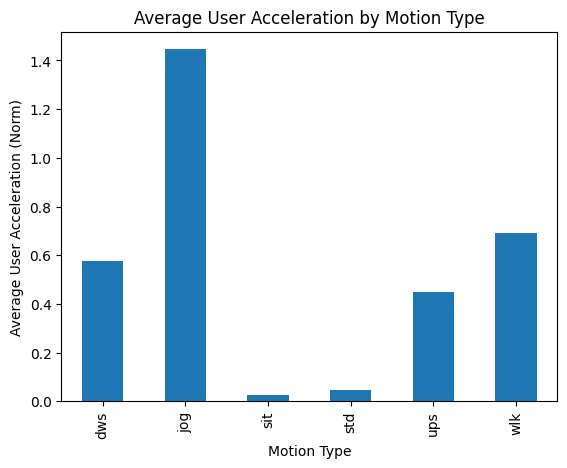

In [65]:
df_1['user_acceleration_norm'] = np.sqrt(
    df_1['userAcceleration.x']**2 + df_1['userAcceleration.y']**2 + df_1['userAcceleration.z']**2
)

df_1.groupby('motion_type')['user_acceleration_norm'].mean().plot(kind="bar")
plt.xlabel('Motion Type')
plt.ylabel('Average User Acceleration (Norm)')
plt.title('Average User Acceleration by Motion Type')
plt.show()

Notice that jogging exhibits the highest average user acceleration since it is the most intense activity among the motion types. Closely followed behind is walking and stair movement. This make sense as sitting and standing require little to no movement as all. Similarly, we can plot the average attitude, gravity, rotation rate.

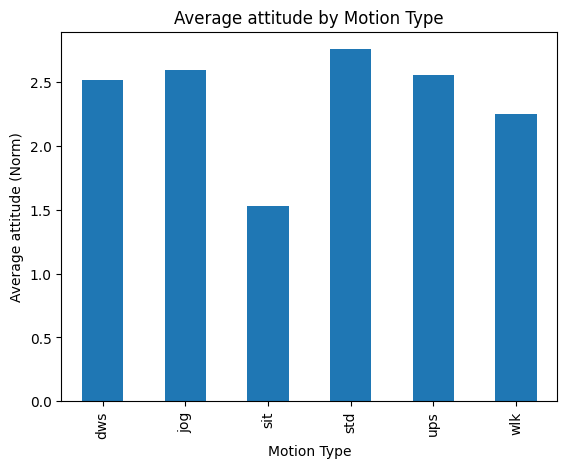

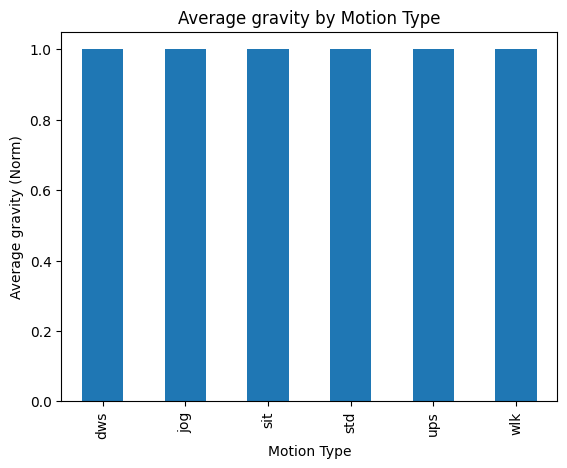

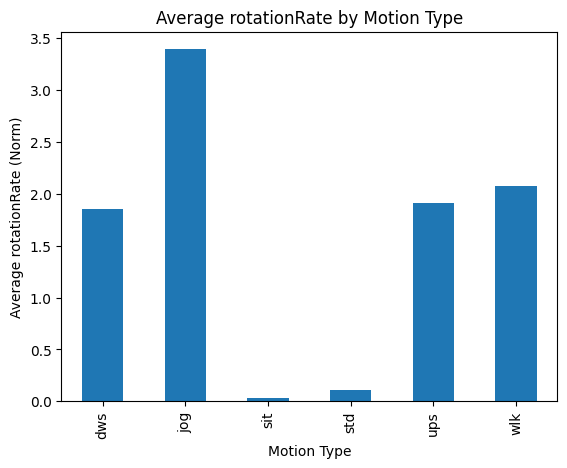

In [67]:
df_1['attitude_norm'] = np.sqrt(
    df_1['attitude.roll']**2 + df_1['attitude.pitch']**2 + df_1['attitude.yaw']**2
)
df_1['gravity_norm'] = np.sqrt(
    df_1['gravity.x']**2 + df_1['gravity.y']**2 + df_1['gravity.z']**2
)
df_1['rotationRate_norm'] = np.sqrt(
    df_1['rotationRate.x']**2 + df_1['rotationRate.y']**2 + df_1['rotationRate.z']**2
)

for move in ['attitude', 'gravity', 'rotationRate']:
    df_1.groupby('motion_type')[move + '_norm'].mean().plot(kind="bar")
    plt.xlabel('Motion Type')
    plt.ylabel('Average ' + move +' (Norm)')
    plt.title('Average '+ move +' by Motion Type')
    plt.show()

In [71]:
df_1.drop('user_acceleration_norm', axis=1, inplace=True)
df_1.drop('attitude_norm', axis=1, inplace=True)
df_1.drop('gravity_norm', axis=1, inplace=True)
df_1.drop('rotationRate_norm', axis=1, inplace=True)

**Closer look at our subjects**

Which user has the highest average acceleration when doing a long jog?

/var/folders/18/nkmj3tqs7pz23j5686j11jzr0000gn/T/ipykernel_34160/3813316674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['user_acceleration_norm'] = np.sqrt(
/var/folders/18/nkmj3tqs7pz23j5686j11jzr0000gn/T/ipykernel_34160/3813316674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code['user_acceleration_norm'] = np.sqrt(
/var/folders/18/nkmj3tqs7pz23j5686j11jzr0000gn/T/ipykernel_34160/3813316674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

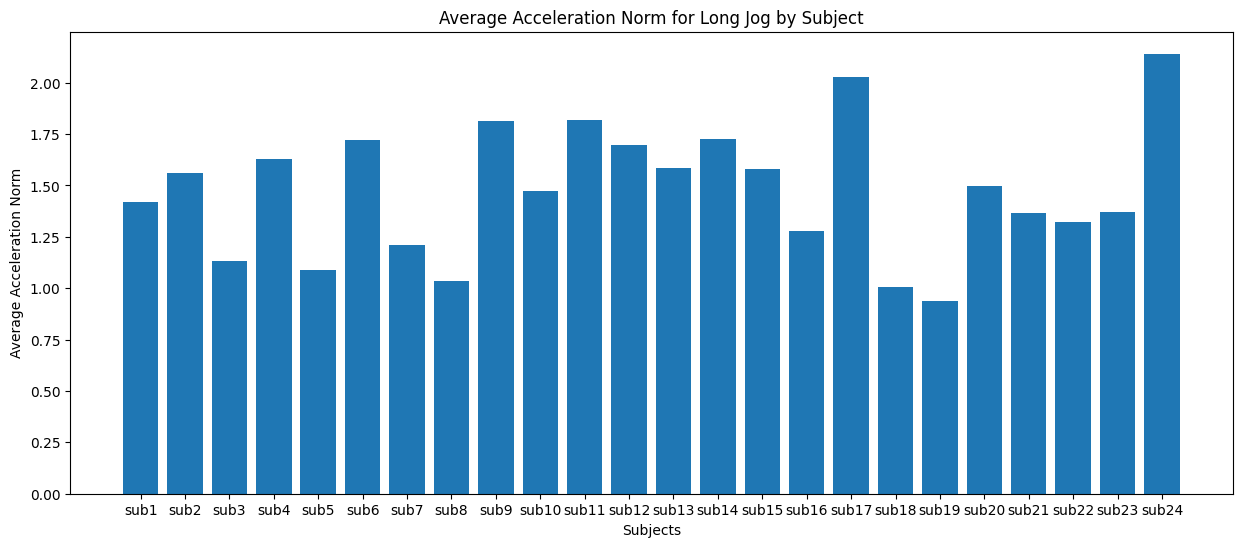

In [94]:
averages = list()
for code in range(1, 25):
    code = df_1[(df_1['motion_type'] == 'jog') & (df['trial_type'] == 'long') & (df_1['subject_code'] == code)]
    code['user_acceleration_norm'] = np.sqrt(
        code['userAcceleration.x']**2 + code['userAcceleration.y']**2 + code['userAcceleration.z']**2
    )
    averages.append(code['user_acceleration_norm'].mean())

subjects = [f'sub{num}' for num in range(1, 25)]
plt.figure(figsize=(15, 6))
plt.bar(subjects, averages)
plt.xlabel('Subjects')
plt.ylabel('Average Acceleration Norm')
plt.title('Average Acceleration Norm for Long Jog by Subject')
plt.show()


In [98]:
subjects[subjects['code'] == 24]

,code,weight,height,age,gender
23,24,74,173,18,0


Notice that subject 24 had the highest average acceleration during the long job. This makes sense they are fairly young.